In [14]:
import torch 
from gsplat import rasterization
import matplotlib.pyplot as plt

In [2]:
device="cuda:0" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda:0'

In [4]:
model_path = "../results/south-building/ckpts/ckpt_6999_rank0.pt"
g_model = torch.load(model_path, map_location=device, weights_only=True)

In [7]:
g_model['splats'].keys()

odict_keys(['means', 'opacities', 'quats', 'scales', 'sh0', 'shN'])

In [5]:
viewmats = torch.eye(4, device=device)[None, :, :]
Ks = torch.tensor([
   [300., 0., 150.], [0., 300., 100.], [0., 0., 1.]], device=device)[None, :, :]

In [6]:
width, height = 300, 200

In [22]:
n = len(g_model['splats']['means'])
means = g_model['splats']['means'][:n]
quats = g_model['splats']['quats'][:n]
opacities = g_model['splats']['opacities'][:n]
scales = g_model['splats']['scales'][:n]
sh0 = g_model['splats']['sh0'][:n]

In [23]:
colors, alphas, meta = rasterization(
   means=means, quats=quats, scales=scales, opacities=opacities, 
    colors=sh0, viewmats=viewmats, Ks=Ks, width=width, height=height, sh_degree=0
)

In [24]:
colors

tensor([[[[0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          ...,
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843]],

         [[0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          ...,
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843]],

         [[0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          ...,
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843]],

         ...,

         [[0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          ...,
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843],
          [0.3764, 0.3134, 0.2843]],

         [[0.3764, 0.3134, 0.2843],
          [0.3764

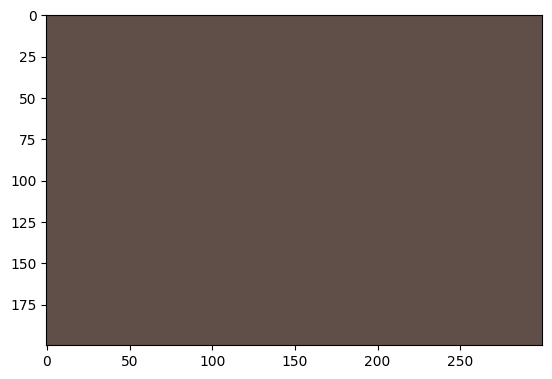

In [25]:
plt.imshow(colors.cpu().numpy()[0])

In [ ]:
w2c = np.concatenate([img_cam.matrix(), bottom])

w2c_mats = np.stack(w2c_mats, axis=0)

# Convert extrinsics to camera-to-world.
camtoworlds = np.linalg.inv(w2c_mats)